In [1]:
import matplotlib.pyplot as plt
import numpy as np

## データのロード

In [2]:
from keras.datasets import reuters

# 出現頻度が高い 10,000個 の単語のみを残す
# 「ValueError: Object arrays cannot be loaded when allow_pickle=False」というエラーについて
# https://qiita.com/INM/items/a790676455d103c05ed2)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
train_data.shape, train_labels.shape

((8982,), (8982,))

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
train_labels[0]

3

In [6]:
np.bincount(test_labels)

array([ 12, 105,  20, 813, 474,   5,  14,   3,  38,  25,  30,  83,  13,
        37,   2,   9,  99,  12,  20, 133,  70,  27,   7,  12,  19,  31,
         8,   4,  10,   4,  12,  13,  10,   5,   7,   6,  11,   2,   3,
         5,  10,   8,   3,   6,   5,   1])

## 元の文章に復元する場合

In [7]:
# 単語に戻す
word_index = reuters.get_word_index()

word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [8]:
# 整数のインデックスを単語にマッピング(KeyとValueの入れ替え)
reverse_word_index = dict([(value, key) for key, value in word_index.items()])

In [9]:
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [10]:
# 0,1,2 は  「パディング」「シーケンスの開始」「不明」  になっているので注意
decoded_review = ' '.join([reverse_word_index.get(i  -3, '?') for i in train_data[0]])

In [11]:
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## データの準備

### 入力データの変換(one-hot encoding)

In [12]:
import  numpy as np

def vectorize_sequences(sequences, dimension=10000):
    """one-hot encoding"""
    results  = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    
    return results

In [13]:
X_trainval = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [14]:
X_trainval

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [15]:
X_val = X_trainval[:1000]
X_train = X_trainval[1000:]

In [16]:
X_train.shape, X_val.shape, X_test.shape

((7982, 10000), (1000, 10000), (2246, 10000))

### 出力データの変換

In [17]:
from keras.utils import to_categorical

y_trainval = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [18]:
y_val = y_trainval[:1000]
y_train = y_trainval[1000:]

In [19]:
y_train.shape, y_val.shape, y_test.shape

((7982, 46), (1000, 46), (2246, 46))

## ネットワークの構築

In [20]:
from keras import backend, layers, models

backend.clear_session()


model = models.Sequential()

"""層の内部構成を分かりやすくするためにあえて冗長に記述する"""

# 隠れ層その1
model.add(layers.Dense(units=64, input_shape=(10000,), name="Hidden_1"))
model.add(layers.Activation("relu", name="ReLU_1"))

# 隠れ層その2
model.add(layers.Dense(units=64,  name="Hidden_2"))
model.add(layers.Activation("relu", name="ReLU_2"))

# 出力層
model.add(layers.Dense(units=46, name="Output"))

# 出力層の活性化関数は softmax (46種類の確率分布を出力することになる)
model.add(layers.Activation("softmax", name="Softmax"))

# ネットワーク構成の表示
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_1 (Dense)             (None, 64)                640064    
_________________________________________________________________
ReLU_1 (Activation)          (None, 64)                0         
_________________________________________________________________
Hidden_2 (Dense)             (None, 64)                4160      
_________________________________________________________________
ReLU_2 (Activation)          (None, 64)                0         
_________________________________________________________________
Output (Dense)               (None, 46)                2990      
_________________________________________________________________
Softmax (Activation)         (None, 46)                0         
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [21]:
from keras import losses, metrics, optimizers

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["acc"])

# このように記述することもできる
# model.compile(optimizer=optimizers.RMSprop(lr=0.01),
#               loss=losses.categorical_crossentropy,
#               metrics=[metrics.categorical_accuracy])

## 学習

In [22]:
history = model.fit(X_train,
                    y_train,
                    batch_size=512,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_val, y_val)
                    )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 124us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 83us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 86us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

### historyの寄り道

In [23]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [24]:
history.history["loss"]

[2.53220713918175,
 1.4452012063148056,
 1.0952716777570204,
 0.8696656611532653,
 0.7033555758713302,
 0.5666506816736889,
 0.45813379356270295,
 0.3695438782827085,
 0.3032133594935653,
 0.2537341575086699,
 0.21866930517538602,
 0.18727146025230879,
 0.17026739173427138,
 0.15356514263693716,
 0.1389515730364524,
 0.1313142007498238,
 0.12167608073535224,
 0.11978300949089571,
 0.11377616504833113,
 0.11105749745083404]

In [25]:
history.history["acc"]

[0.4954898522868547,
 0.6879228267924166,
 0.7650964676930593,
 0.8164620390663586,
 0.8471561013024362,
 0.8802305185475227,
 0.9047857683513195,
 0.9230769236444442,
 0.9314708101871885,
 0.9413680791466554,
 0.9471310437606768,
 0.9507642197776217,
 0.9521423200114094,
 0.9553996501814838,
 0.9560260586169871,
 0.9560260579299878,
 0.9579052861039724,
 0.9581558507536025,
 0.9596592326774779,
 0.9592833870247592]

In [26]:
history.history["val_loss"]

[1.7208096437454223,
 1.3458682403564453,
 1.17075843334198,
 1.0792589359283447,
 0.9843868741989136,
 0.9410877237319947,
 0.9083001413345337,
 0.9363257675170898,
 0.891695858001709,
 0.9071138815879822,
 0.9177447404861451,
 0.9027221693992614,
 0.9322572302818298,
 0.9688790769577026,
 0.9685786247253418,
 1.0220386447906493,
 1.0254497156143187,
 1.0429726610183716,
 1.0955477256774901,
 1.0673940649032594]

In [27]:
history.history["val_acc"]

[0.6120000009536744,
 0.7060000066757202,
 0.7429999876022338,
 0.7589999938011169,
 0.7809999952316284,
 0.8039999895095825,
 0.8019999942779541,
 0.7889999942779541,
 0.8090000028610229,
 0.8110000052452088,
 0.8130000114440918,
 0.8129999980926513,
 0.8110000076293945,
 0.8050000076293945,
 0.8150000138282776,
 0.8059999895095825,
 0.7970000100135803,
 0.8059999942779541,
 0.7969999942779541,
 0.8020000004768372]

## 可視化

### Lossの可視化

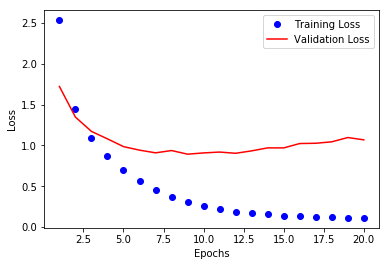

In [28]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = history.params["epochs"]
epoch_range = range(1, epochs + 1)

plt.plot(epoch_range, train_loss, "bo", label="Training Loss")
plt.plot(epoch_range, val_loss, "r", label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()

plt.show()

### Accuracyの可視化

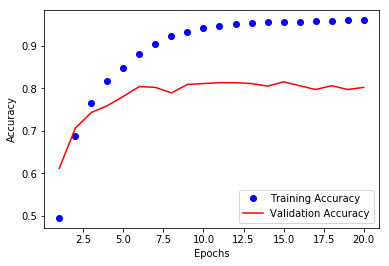

In [29]:
train_acc = history.history["acc"]
val_acc = history.history["val_acc"]

epochs = history.params["epochs"]
epoch_range = range(1, epochs + 1)

plt.plot(epoch_range, train_acc, "bo", label="Training Accuracy")
plt.plot(epoch_range, val_acc, "r", label="Validation Accuracy")


plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()

plt.show()

## 過学習する前に学習を打ち切って改めて学習する

In [30]:
# ネットワーク構成は同じなので簡略的な記述を利用する
backend.clear_session()

model_final = models.Sequential()

model_final.add(layers.Dense(64, activation="relu", input_shape=(10000,), ))
model_final.add(layers.Dense(64,  activation="relu"))
model_final.add(layers.Dense(46, activation="softmax"))

model_final.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["acc"])

In [31]:
# 学習には 訓練データと検証データを合わせたものを使うこと！
model_final.fit(X_trainval,
                y_trainval,
                batch_size=512,
                epochs=4,
                verbose=1)

Epoch 1/4
8982/8982 [==============================] - 1s 91us/step - loss: 2.4437 - acc: 0.5332
Epoch 2/4
8982/8982 [==============================] - 1s 78us/step - loss: 1.3241 - acc: 0.7161
Epoch 3/4
8982/8982 [==============================] - 1s 78us/step - loss: 0.9744 - acc: 0.7869
Epoch 4/4
8982/8982 [==============================] - 1s 77us/step - loss: 0.7565 - acc: 0.8390


In [32]:
model_final.evaluate(X_test, y_test)

2246/2246 [==============================] - 0s 86us/step


[1.0409910222407652, 0.7662511130899377]

In [33]:
# 確率を表示してみる
model_final.predict(X_test)

array([[1.2281010e-04, 5.7948404e-04, 4.8082051e-04, ..., 1.7955140e-04,
        4.1952368e-05, 3.1750227e-05],
       [2.3702674e-02, 1.4147127e-02, 2.5969855e-02, ..., 2.9679714e-03,
        1.1466433e-04, 5.3872331e-04],
       [1.1270825e-02, 5.2987105e-01, 8.2669109e-03, ..., 1.0761749e-03,
        2.7975840e-03, 6.6124275e-04],
       ...,
       [2.0303219e-04, 1.2796577e-03, 5.1518297e-04, ..., 1.5924966e-04,
        5.9266132e-04, 1.0244962e-04],
       [6.4743869e-04, 5.5048582e-03, 2.1300607e-03, ..., 5.4144429e-04,
        3.1287284e-04, 1.7518269e-04],
       [1.1493265e-02, 4.4815224e-01, 1.2755685e-02, ..., 5.5577460e-04,
        2.1114550e-03, 5.2421441e-04]], dtype=float32)

In [34]:
# 先頭から3つだけ確率を表示してみる
model_final.predict_proba(X_test[:3])

array([[1.22810103e-04, 5.79484040e-04, 4.80820512e-04, 5.12566209e-01,
        4.37785834e-01, 5.28065402e-06, 3.19917453e-04, 7.64444922e-05,
        2.13366840e-02, 7.36447109e-05, 4.56406706e-04, 4.08060290e-03,
        1.36140763e-04, 9.35248332e-04, 2.87459388e-05, 6.37508419e-05,
        4.21321578e-03, 1.01848936e-03, 1.41794106e-03, 2.70751631e-03,
        3.39408079e-03, 1.18101423e-03, 2.83802747e-05, 7.02637015e-04,
        9.57095617e-05, 2.60302075e-03, 7.47151862e-05, 9.68883760e-05,
        1.21116369e-04, 1.92510241e-04, 8.47091491e-04, 4.73110878e-04,
        8.05780146e-05, 7.60787443e-05, 1.97756934e-04, 5.34798055e-05,
        1.49089799e-04, 8.39604909e-05, 1.07348089e-04, 2.36082822e-04,
        1.51989749e-04, 3.81241523e-04, 1.36972358e-05, 1.79551309e-04,
        4.19523676e-05, 3.17502272e-05],
       [2.37026736e-02, 1.41471270e-02, 2.59698555e-02, 2.46042793e-04,
        5.23760961e-03, 9.62590240e-03, 4.90634795e-03, 9.04851302e-04,
        2.55947863e-03,

In [35]:
# 確率が最も高いクラスに判定される
model_final.predict_classes(X_test[:3])

array([ 3, 10,  1])